# Project:Medical Appointment No Shows Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information from 100k medical appointments in Brazil and is focused on the **question** of Whether or not patients show up for their appointment**!!??**


## importing all important libraries
### and reading the dataset file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv('noshowappointments-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
df.shape


(110527, 14)

We can see that we have data for more than 110k Patient     


### Converting all columns  to lowercase and uniforming the typing

In [6]:
df.columns = df.columns.str.lower()

In [7]:
df.rename(columns={'no-show':'no_show','scheduledday':'scheduled_date','appointmentday':'appointment_date'},inplace=True)

### converting all dates we have to date-time object so it becomes uniform and capable of doing arithmetic operations

In [8]:
df['scheduled_date'] = pd.to_datetime(df['scheduled_date'])
df['appointment_date'] = pd.to_datetime(df['appointment_date'])

In [9]:
df['chronic_diseases_num'] = df['hipertension']+df['diabetes']+df['alcoholism']+df['handcap']

<a id='wrangling'></a>


## Data Cleaning
### See if there are any null values  so we drop  or fill it

In [10]:
df.isnull().sum()

patientid               0
appointmentid           0
gender                  0
scheduled_date          0
appointment_date        0
age                     0
neighbourhood           0
scholarship             0
hipertension            0
diabetes                0
alcoholism              0
handcap                 0
sms_received            0
no_show                 0
chronic_diseases_num    0
dtype: int64

###### there is no null values

### see if there are any duplicates to drop
with keeping the Patient_Id so we do not drop 2 definite patients with the same states.

In [11]:
df.duplicated().sum()

0

In [12]:
df.drop_duplicates(inplace=True)

### Dropping non-useful attributes
    because they are not useful in the analysis


In [13]:
df.drop(['patientid', 'appointmentid'], axis = 1, inplace=True)

### seeing if there are any unlogical values to drop

In [14]:
df.query('age <  1')

,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,chronic_diseases_num
59,F,2016-04-29 08:08:43+00:00,2016-04-29 00:00:00+00:00,0,CONQUISTA,0,0,0,0,0,0,No,0
63,M,2016-04-27 10:46:12+00:00,2016-04-29 00:00:00+00:00,0,SÃO BENEDITO,0,0,0,0,0,0,No,0
64,M,2016-04-25 13:28:21+00:00,2016-04-29 00:00:00+00:00,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No,0
65,M,2016-04-27 10:48:50+00:00,2016-04-29 00:00:00+00:00,0,CONQUISTA,0,0,0,0,0,0,No,0
67,F,2016-04-29 08:53:02+00:00,2016-04-29 00:00:00+00:00,0,NOVA PALESTINA,0,0,0,0,0,0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,F,2016-05-16 12:30:58+00:00,2016-06-01 00:00:00+00:00,0,RESISTÊNCIA,0,0,0,0,0,0,No,0
110346,M,2016-06-06 14:22:34+00:00,2016-06-08 00:00:00+00:00,0,RESISTÊNCIA,0,0,0,0,0,0,No,0
110454,F,2016-06-03 15:18:44+00:00,2016-06-03 00:00:00+00:00,0,RESISTÊNCIA,0,0,0,0,0,0,No,0
110460,F,2016-06-03 08:56:51+00:00,2016-06-03 00:00:00+00:00,0,RESISTÊNCIA,0,0,0,0,0,0,No,0


In [15]:
df.drop(df.query('age < 1').index, axis=0, inplace=True)

### Calculating the waiting  time 

In [16]:
df['waiting_time'] = df.appointment_date - df.scheduled_date

In [17]:
df.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,chronic_diseases_num,waiting_time
count,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987
mean,38.316085,0.101031,0.203772,0.074243,0.031406,0.022975,0.323264,0.332396,9 days 16:44:16.229663417
std,22.466214,0.301371,0.402804,0.262167,0.174412,0.164115,0.467725,0.638976,15 days 06:04:20.028553624
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7 days +10:10:40
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1 days +15:42:17
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3 days 11:54:28
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,13 days 16:59:23.500000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000,178 days 13:19:01


### Noticing that there are Negative waiting values that we have to drop

#### seperating the dayes so we can detrmin its values as integers

In [18]:
df['waiting_days'] = df['waiting_time'].dt.days

#### Drop the waiting_time column because it is not necessary now.

In [19]:
df.drop(['waiting_time'], axis=1, inplace=True)

### Dropping negative waiting values

In [20]:
negative_wating_days = df.query('waiting_days < 0')
df.drop(negative_wating_days.index,axis = 0, inplace=True)

### Now we have 69K medical appointments 

In [21]:
df.shape

(69828, 14)

In [22]:
df.head()

,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,chronic_diseases_num,waiting_days
5,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No,1,1
6,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,0,1
7,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,0,1
9,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No,0,1
10,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,No,0,1


In [43]:
df[['age']]

,age
5,76
6,23
7,39
9,19
10,30
...,...
110522,56
110523,51
110524,21
110525,38


In [42]:
type(df['age'])

pandas.core.series.Series

In [23]:
df.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,chronic_diseases_num,waiting_days
count,69828.000000,69828.000000,69828.000000,69828.000000,69828.000000,69828.000000,69828.000000,69828.000000,69828.000000
mean,39.677579,0.095148,0.215272,0.077003,0.026093,0.020636,0.495288,0.339004,14.577089
std,22.248419,0.293421,0.411014,0.266599,0.159412,0.156365,0.499981,0.641698,16.512813
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
75%,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,21.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000,178.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69828 entries, 5 to 110526
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   gender                69828 non-null  object             
 1   scheduled_date        69828 non-null  datetime64[ns, UTC]
 2   appointment_date      69828 non-null  datetime64[ns, UTC]
 3   age                   69828 non-null  int64              
 4   neighbourhood         69828 non-null  object             
 5   scholarship           69828 non-null  int64              
 6   hipertension          69828 non-null  int64              
 7   diabetes              69828 non-null  int64              
 8   alcoholism            69828 non-null  int64              
 9   handcap               69828 non-null  int64              
 10  sms_received          69828 non-null  int64              
 11  no_show               69828 non-null  object             
 12  chr

<a id='eda'></a>

# **Exploratory Data Analysis**

In [25]:
def to_chart(atrib):
    """"
    This function aims to plot a histogram visualizing the relationship
    between a chosen attribute 
    in 2 conditions which are no-show = Yes and no-show = No
    """
    plt.figure(figsize=(10,5),dpi=80)
    df[atrib][df['no_show'] == 'No'].hist(alpha = 0.5, color = 'red', label = 'No')
    df[atrib][df['no_show']=='Yes'].hist(label = 'Yes')

# Q1
#### What is the relation between waiting days and not showing at the appointment

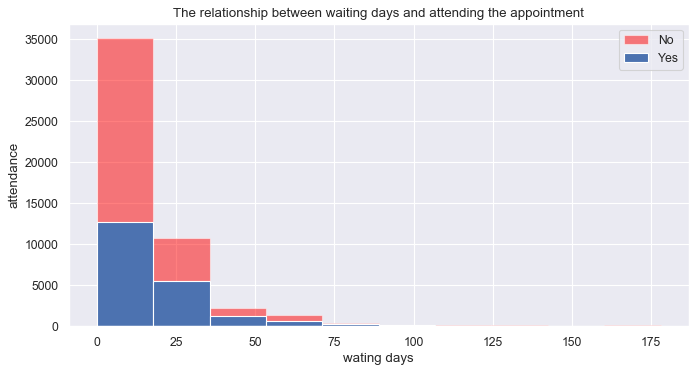

In [26]:
to_chart('waiting_days')
plt.title('The relationship between waiting days and attending the appointment')
plt.xlabel('wating days')
plt.ylabel('attendance')
plt.legend();

### The more waiting days tend to have more no-showing cases 

# Q2

### Is receiving an SMS raising the probability of showing up?

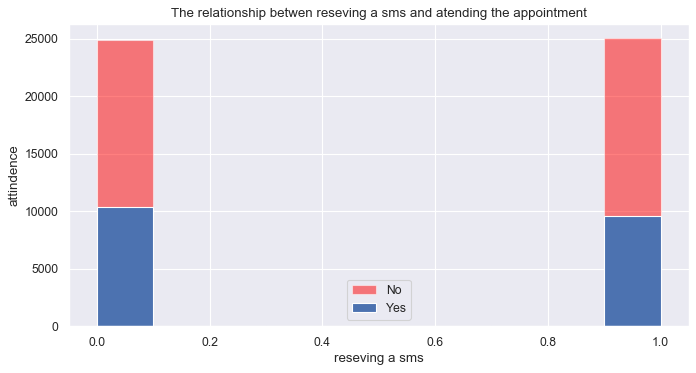

In [27]:
to_chart('sms_received')
plt.title('The relationship betwen reseving a sms and atending the appointment')
plt.xlabel('reseving a sms')
plt.ylabel('attindence')
plt.legend();

#### NO resevivng SMS dose not raising the probabilty of showing up

# Q3
## Is there a relationship betwen age and no-show?

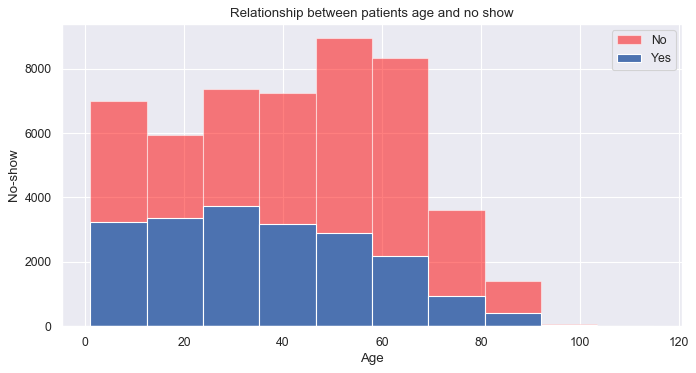

In [28]:
to_chart('age')
plt.title('Relationship between patients age and no show')
plt.xlabel('Age')
plt.ylabel('No-show')
plt.legend();

### Lokes like there is  after the age of 60 
#### people older than 60 tends to miss their appointments

# Q4
### What is the relationship betwen neighbourhoods according and waitingdays mean?

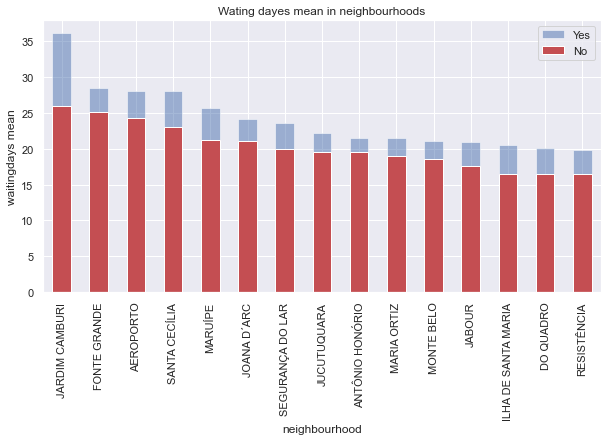

In [29]:
plt.figure(figsize=(10,5))

df.query('no_show == "Yes"').groupby('neighbourhood').waiting_days.mean().sort_values(ascending=False)[:15].plot(kind = 'bar',alpha = .5,label = 'Yes')
df.query('no_show == "No"').groupby('neighbourhood').waiting_days.mean().sort_values(ascending=False)[:15].plot(kind = 'bar',color = 'r',label = 'No')

plt.title('Wating dayes mean in neighbourhoods')
plt.ylabel('waitingdays mean')
plt.legend()

Jardam C. has the most wating days mean and highst no -show

#### 

# Q5
#### ًWhat is the Percentage of gender no-showing?

In [30]:
no_show_m = df.query('gender == "M" & no_show == "Yes"').shape[0]
no_show_f = df.query('gender == "F" & no_show == "Yes"').shape[0]

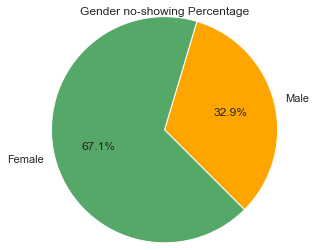

In [31]:
plt.pie([no_show_m,no_show_f ], labels=['Male', 'Female']
        , autopct='%1.1f%%', startangle=315,colors =['orange','g'],radius=1.3)

plt.title("Gender no-showing Percentage");

#### Females have more no-show percentage

### ًWhat is the Percentage of genderin the data?

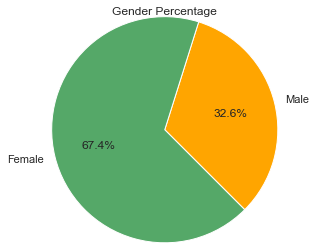

In [32]:
plt.pie([df.query('gender == "M"').shape[0], df.query('gender == "F"').shape[0]], labels=['Male', 'Female']
        , autopct='%1.1f%%', startangle=315,colors =['orange','g'],radius=1.3)

plt.title("Gender Percentage");

#### It's reasonable that most of no-show gender is female because they are the most gender in the data

# Q6
### ًWhat is the Percentage of chronic disease no-showing?

In [33]:
hipertension_num = df.query('hipertension == 1 & no_show == "Yes" ').shape[0]
diabetes_num = df.query('diabetes == 1 & no_show == "Yes"').shape[0]

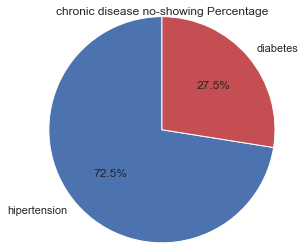

In [34]:
plt.pie([hipertension_num,diabetes_num],labels = ['hipertension','diabetes']
        , autopct='%1.1f%%', startangle=90,colors =['b','r'],radius=1.3);
plt.title("chronic disease no-showing Percentage");

#### as showen hipertension are the most chronic disease with no-showing patients

### ًWhat is the Percentage of chronic disease in the data?

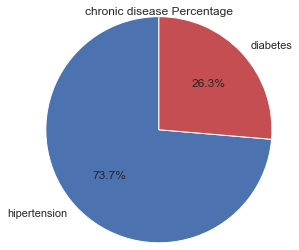

In [35]:
plt.pie([df.query('hipertension == 1').shape[0],df.query('diabetes == 1').shape[0]],labels = ['hipertension','diabetes']
        , autopct='%1.1f%%', startangle=90,colors =['b','r'],radius=1.3);
plt.title("chronic disease Percentage");

#### It's reasonable that most of no-show chronic disease is hipertensive because they are the most chronic disease in the data

<a id='conclusions'></a>
# Conclusions

## recap for Analysis results

### 1-First, we visualized the relationship between the waiting days and the no-showing to see if it affects the no showing or how much does it affect and the chart tells us that it strongly affects according to the data we have

### 2-seconde we visualise the second possible attribute that maybe have a strong relationship with no-showwich is SMS receivingbut after the visualize we see the opposite receiving SMS does not have a relationship with no-show 
### I asked if there is a relation between them because more waiting days could make the patient forget the appointment or see any other soon appointment 

### 3-we wanted to see how is the age distribution in the data and there no-show   and we found that old patients tend to miss their appointments

### and this question has been asked to see if there is an age category missing there appointments and we found that

### 4-in Q4 we found that Jardam C. has the most wating days mean and highst no -show
### we asked Q4 to see the neighbourhood with the most wating days mean 

### 5-and 6- in Q5 and Q6 I just calculated some statistics about the data and found the next :
##### Females have more no-show percentage than males but  It's reasonable that most of no-show gender is female because they are the most gender in the data
##### hipertension are the most chronic disease with no-showing patients but  It's reasonable that most of no-show chronic disease is hipertension because they are the most chronic disease in the data


## Discusion about the dataset


 ### - The data is not big enough to get accurate results it was limited so no advanced statistics were performed
 ### - There were many missing values so many entries in the dataset have been removed
 ### - It was not unbiased it has been done on 67% of females so the results are not accurate


